모두의 연구소, 2024 AI 코칭스터디 팀 활동을 통해 정리한 내용입니다.  
- 로롱코치_6팀 : @박문지 @서진형 @엄수빈 @엔터6(변찬우) @miji(박미지) @Shinar(신애라) 

# **PCA vs t-SNE 비교분석**

케이스 바이 케이스로 PCA와 t-SNE의 선택 기준을 정리해보자 
1) 데이터의 특성:
- 고차원 데이터가 직선적 구조를 가지는 경우: PCA 
- 고차원 데이터가 비직선적 구조를 가지는 경우: t-SNE
2) 속도와 규모:
- 대규모 데이터에 대해 빠른 처리가 필요한 경우: PCA
- 데이터가 비교적 적고 국소적 구조가 중요한 경우: t-SNE
3) 목적:
- 특징 추출 및 데이터 압축이 필요한 경우: PCA
- 데이터 시각화 및 패턴 발견이 필요한 경우: t-SNE
4) 실무 예제
- PCA 사용 사례:
고객 데이터의 주요 특성을 분석하여 중요한 변수를 찾고, 차원을 축소하여 모델의 성능을 향상시킵니다.
유전자 데이터에서 중요한 유전자 패턴을 추출하고, 데이터의 잡음을 줄여 분석합니다.
- t-SNE 사용 사례:
이미지 데이터나 텍스트 데이터의 임베딩을 2차원으로 축소하여 유사한 이미지나 문서가 어떻게 클러스터링되는지 시각화합니다.
마케팅 캠페인에서 고객의 행동 패턴을 시각화하여 유사한 행동을 보이는 고객 군을 식별합니다.
이 두 기법은 서로 보완적인 역할을 할 수 있습니다. 예를 들어, 먼저 PCA로 차원을 어느 정도 축소한 후, t-SNE를 적용하여 시각화하는 방법도 실무에서 사용됩니다.


## 실습 

선형 차원 축소방법인 'PCA'와 비선현 차원 축소방법인 't-SNE'와 관련된 예시 코드를 실습해보기 위한 내용입니다 

### Digits 데이터셋 기반 예시

In [ ]:
pip install scikit-learn matplotlib

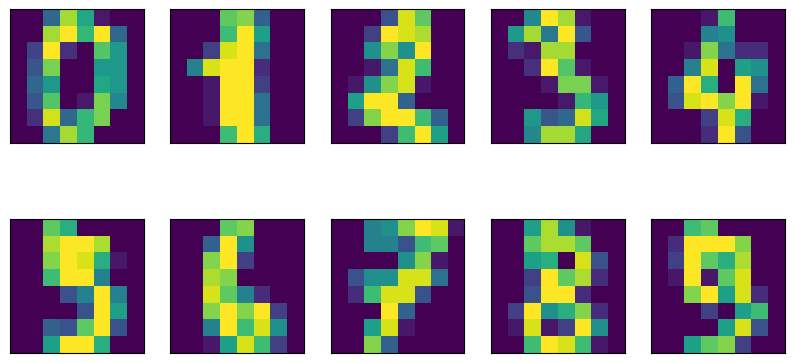

In [10]:
import matplotlib.pyplot as plt
digits = load_digits()
fig, axes = plt.subplots(2,5,figsize=(10,5),
                        subplot_kw = {'xticks':(), 'yticks':()})
for ax, imgs in zip(axes.ravel(), digits.images):
    ax.imshow(imgs)

1. PCA로 구현 시,

Text(0, 0.5, '두 번째 주성분')

/Users/chanwoo/.venvs/aienv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 52395 (\N{HANGUL SYLLABLE CEOS}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/chanwoo/.venvs/aienv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/chanwoo/.venvs/aienv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/chanwoo/.venvs/aienv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/chanwoo/.venvs/aienv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/chanwoo/.venvs/aienv/lib

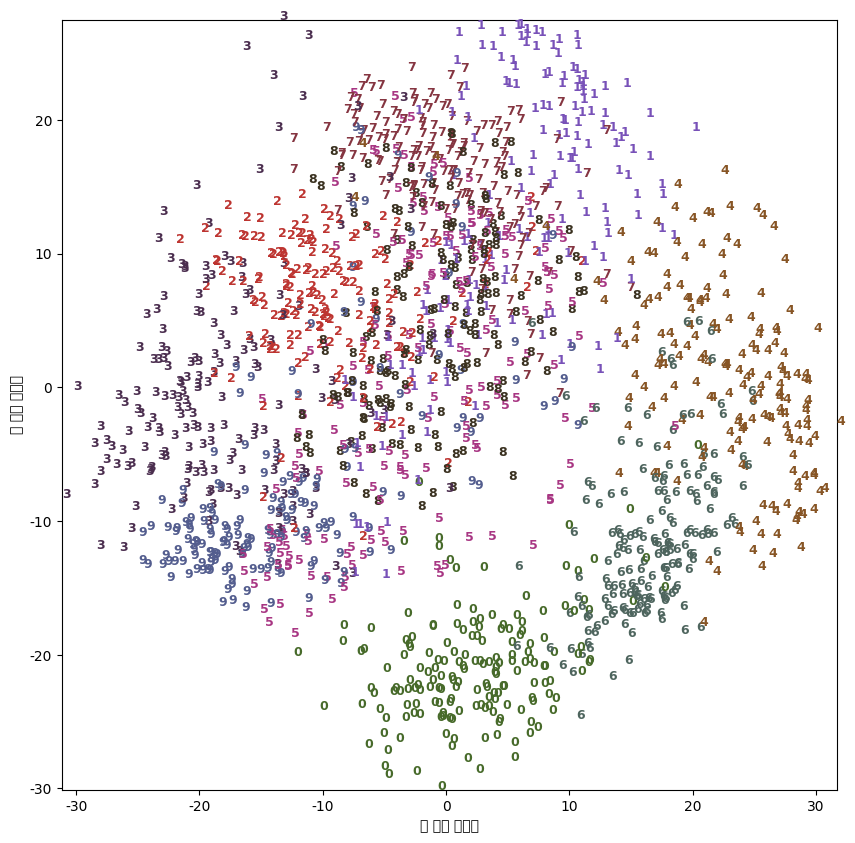

In [11]:
from sklearn.decomposition import PCA
from matplotlib import font_manager
plt.rc('axes', unicode_minus=False)
#2차원으로 축소
pca = PCA(n_components=2)
pca.fit(digits.data)
#처음 두 개의 주성분으로 숫자 데이터를 변환
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i,1], str(digits.target[i]),
            color = colors[digits.target[i]] ,fontdict={'weight': 'bold', 'size':9}           )
##fontdict={'weight': 'bold', 'size':9}
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

T-SNE로 구현 시,

Text(0, 0.5, 't-SNE 특성 1')

/Users/chanwoo/.venvs/aienv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/chanwoo/.venvs/aienv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/chanwoo/.venvs/aienv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chanwoo/.venvs/aienv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


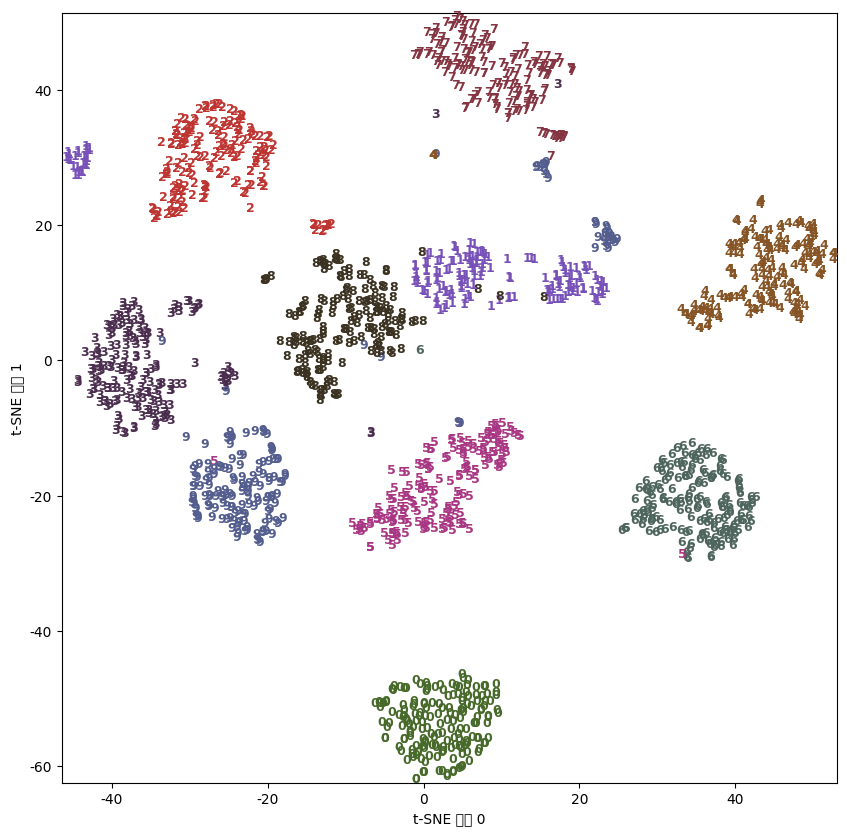

In [12]:
from sklearn.manifold import TSNE
plt.rc('axes', unicode_minus=False)
tsne = TSNE(random_state = 42)
#TSNE에는 transform 메서드가 없으므로 대신 fit_transform을 사용한다.
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict = {'weight':'bold','size':9})
plt.xlabel("t-SNE 특성 0")
plt.ylabel("t-SNE 특성 1")

### Iris 데이터셋 기반 예시

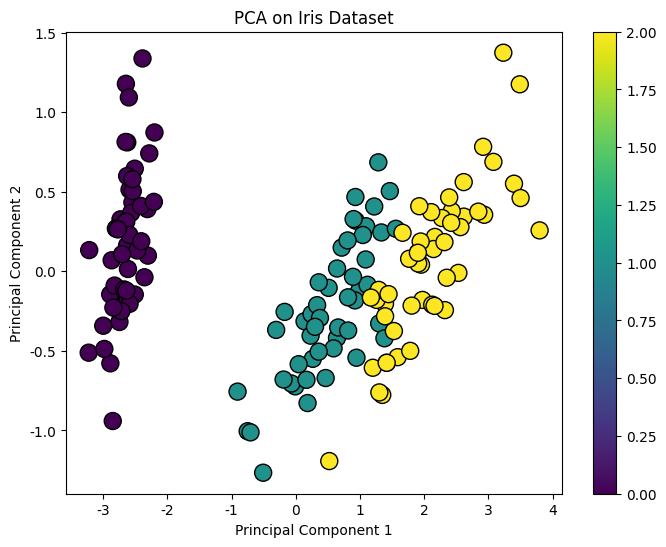

In [14]:
#PCA 예시코드
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
# Iris 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target
# PCA 적용 (2차원으로 축소)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=150)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.colorbar()
plt.show()

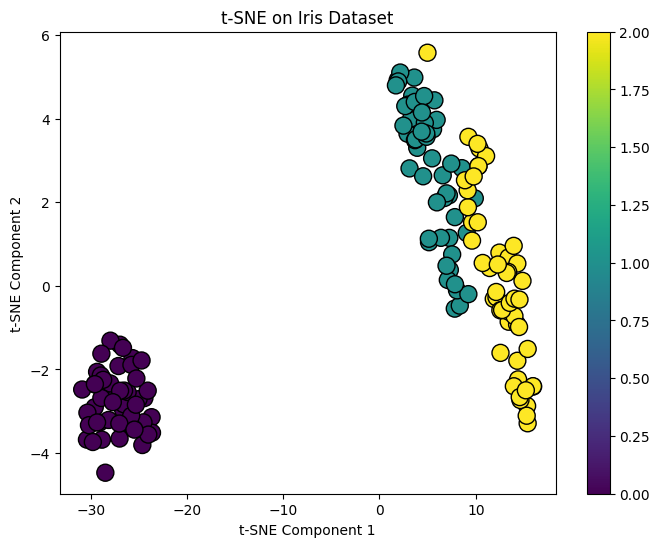

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# t-SNE 적용 (2차원으로 축소)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', s=150)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE on Iris Dataset')
plt.colorbar()
plt.show()